# Optimization - Otimização

Instalando a biblioteca `numdifftools` e suas dependências.

In [118]:
!pip install numdifftools

You are using pip version 18.0, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [119]:
import numpy as np
import timeit
from scipy import optimize as opt
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import get_test_data
import numdifftools as nd

## Scalar functions - Funções Escalares

In [120]:
def f(x):
    return (x+3)*(x-1)**2

In [121]:
X = np.arange(-5, 5, .1)
Y = f(X)
plt.plot(X, Y)
plt.show()

In [122]:
%timeit opt.minimize_scalar(f, bracket=(-2, 2, 4), method='golden')

567 µs ± 16.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [123]:
%timeit opt.minimize_scalar(f, bracket=(-2, 2, 4), method='brent')

714 µs ± 33.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Function to calculate first derivative of $f$ at $x_{0}$

In [124]:
def d1(x, f, h=1e-5):
    return (f(x+h)-f(x-h))/(2*h)

In [125]:
# Test
d1(5, f)

79.99999999697138

Function to calculate <u>second</u> derivative of $f$ at $x_{0}$

In [126]:
def d2(x, f, h=1e-5):
    return (f(x+2*h)+f(x-2*h)-2*f(x))/(2*h)**2

In [127]:
# Test
d2(5, f)

32.000002647691865

Newton-Raphson

In [128]:
def my_newton(f, x0, h=1e-5, delta=1e-5, eps=1e-5):
    
    dif = 1
    der = 1
    i = 0
    
    while dif>eps or der>delta:
        
        i += 1
        d = d1(x0, f)
        x1 = x0 - (d/d2(x0, f))
        dif = abs(x1-x0)
        der = abs(d)
        x0 = x1
        if i > 100:
            break
    
    return x1

In [129]:
%timeit my_newton(f, 10)

74.6 µs ± 4.27 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


### Derivatives - Derivativas

In [130]:
df1 = nd.Derivative(f)
df2 = nd.Derivative(f, n=2)

In [131]:
%timeit opt.minimize(f, 10, method='Newton-CG', jac=df1, hess=df2)

185 ms ± 10.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Refresher of matrix algebra

Quadratic form: $Q(x_{1}, x_{2}) = a_{1}\,x_{1}^2 + a_{2}\,x_{2}^2 + a_{3}\,x_{1}\,x_{2}$ </br></br>

This a algebraic expression can be written with matrix notation:
$
   x=
  \left[ {\begin{array}{c}
   x_{1} \\
   x_{2} \\
  \end{array} } \right]
$
 and  
$
   A=
  \left[ {\begin{array}{c}
   a_{1} & a_{3}/2 \\
   a_{3}/2 & a_{2} \\
  \end{array} } \right]
$
 imply $Q(x)=x^{T}\,A\,x$. Notice that $A$ is a square, **symmetric** matrix. Therefore, there is a one-to-one relationship between quadratic forms and symmetric matrices.</br></br>
 
*Definitions*: </br>
* A quadratic form is *positive definite* iff $Q(x)>0$ for any $x\neq0$.
* A quadratic form is *negative definite* iff $Q(x)<0$ for any $x\neq0$.

<IPython.core.display.Javascript object>


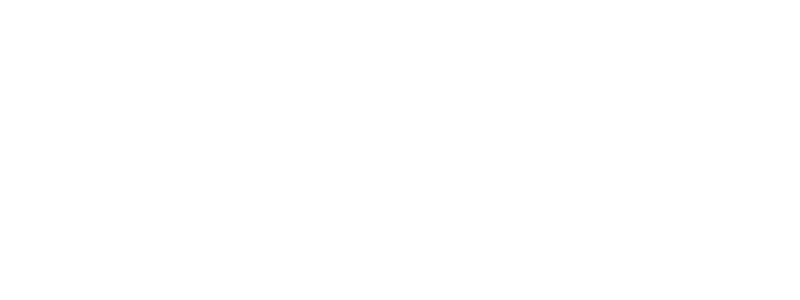

In [132]:
%matplotlib notebook
plt.rcParams['figure.figsize'] = [8, 3]
fig = plt.figure()
fig.suptitle('Definite Quadratic Forms', fontsize=16)

x = np.linspace(-5, 5, 101)
y = np.linspace(-5, 5, 101)
X, Y = np.meshgrid(x, y)

ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_wireframe(X, Y, X**2+Y**2, rstride=10, cstride=10)
ax1.set_title('Positive Definite')

ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_wireframe(X, Y, -X**2-Y**2, rstride=10, cstride=10)
ax2.set_title('Negative Definite')

plt.show()

*Definitions*: </br>
* A quadratic form is *positive semi-definite* iff $Q(x)\geq0$ for any $x$.
* A quadratic form is *negative semi-definite* iff $Q(x)\leq0$ for any $x$.

<IPython.core.display.Javascript object>


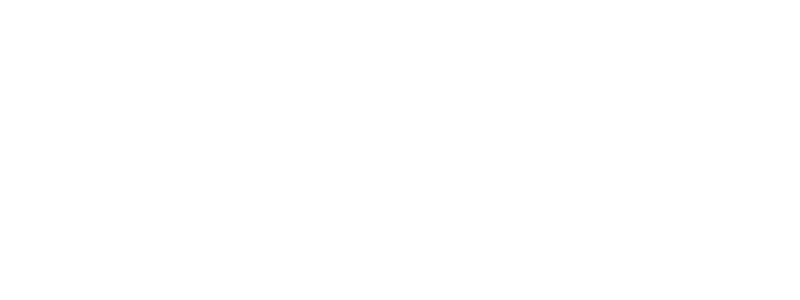

In [133]:
%matplotlib notebook
fig = plt.figure()
fig.suptitle('Semi-Definite Quadratic Forms', fontsize=16)

ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_wireframe(X, Y, (X+Y)**2, rstride=10, cstride=10)
ax1.set_title('Positive Semi-Definite')

ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_wireframe(X, Y, -(X+Y)**2, rstride=10, cstride=10)
ax2.set_title('Negative Semi-Definite')

plt.show()

*Definitions*: </br>
* A quadratic form is *indefinite* iff $Q(x)>0$ for some $x$ and $Q(x)<0$ for another $x$.

<IPython.core.display.Javascript object>


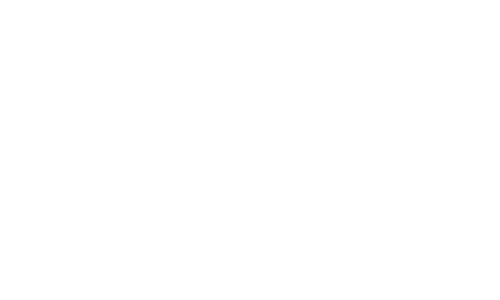

In [134]:
%matplotlib notebook
plt.rcParams['figure.figsize'] = [5, 3]
fig = plt.figure()
fig.suptitle('Indefinite Quadratic Forms', fontsize=16)

ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(X, Y, X**2-Y**2, rstride=10, cstride=10)

plt.show()

## Testing definiteness

In [135]:
def principal_minors(M):
    if M.ndim == 2 and np.all(M == M.transpose()):
        lpm = []
        for k in np.arange(0, M.shape[0], 1):
            lpm.append(np.linalg.det(M[0:k+1, 0:k+1]))
        return lpm

In [136]:
A = np.array([[1, 2, 3], [2, 3, 4], [3, 4, 9]])

In [137]:
principal_minors(A)

[1.0, -1.0, -4.000000000000001]

In [138]:
def positive_definite(M):
    if M.ndim == 2 and np.all(M == M.transpose()):
        return np.all(np.array(principal_minors(M))>0)

In [139]:
positive_definite(A)

False

In [140]:
def negative_definite(M):
    if M.ndim == 2 and np.all(M == M.transpose()):
        n = M.shape[0]
        c = [(-1)**(i+1) for i in np.arange(0, n, 1)]
        return np.all((np.array(c)*np.array(principal_minors(M)))>0)

In [141]:
negative_definite(A)

False

In [142]:
def indefinite(M):
    if M.ndim == 2 and np.all(M == M.transpose()):
        if not positive_definite(M) and not negative_definite(M):
            n = M.shape[0]
            return np.all(np.array(principal_minors(M)) != 0)

In [143]:
indefinite(A)

True

### Eigenvalues, Eigenvectors and Eigen Decomposition

$A$: square matrix ($n \times n$), $x$: column vector ($n \times 1$), $\lambda$: scalar. </br>

*Definition*: $\lambda$ is an **eigenvalue** of $A$ with corresponding $x$ **eigenvector** iff $A\,x=\lambda\,x$.</br>

Eigenvalues must solve $\mathrm{det}(A-\lambda\,I)=0$.

*Result*: If $A$ is a real symmetric matrix, all of its eigenvalues are real numbers, and eigenvectors corresponding to distinct eigenvalues are orthogonal.

*Eigen Decomposition of Symmetric Matrices*: </br>
Let $P = [x_1, x_2, ..., x_n]$ and $D=diag(\lambda_1, \lambda_2, ..., \lambda_n)$. Then $A = P\,D\,P^{-1}$.

If $\lambda_i>0, \forall i$, then $A$ is **positive definite**. </br>

If $\lambda_i<0, \forall i$, then $A$ is **negative definite**. </br>

If $\lambda_i\geq0, \forall i$, then $A$ is **positive semi-definite**. </br>

If $\lambda_i\leq0, \forall i$, then $A$ is **negative semi-definite**.

In [144]:
np.linalg.eig(A)

(array([12.14984759, -0.28900503,  1.13915745]),
 array([[ 0.30595473,  0.90505749, -0.29540249],
        [ 0.43670868, -0.40912915, -0.80118592],
        [ 0.84597709, -0.11612179,  0.52042146]]))

In [145]:
def pos_def(A):
    return (np.all(np.linalg.eig(A)[0]>0))

In [146]:
pos_def(A)

False

## Multivariate functions

In [147]:
def f(x):
    return x[0]**2+x[1]**2-50*np.sin(.5*(x[0]+x[1]))

In [148]:
x = np.array([1, 2, 3])
y = np.array([20, 40, 60])

In [149]:
X, Y = np.meshgrid(x, y)

In [150]:
X

array([[1, 2, 3],
       [1, 2, 3],
       [1, 2, 3]])

In [151]:
Y

array([[20, 20, 20],
       [40, 40, 40],
       [60, 60, 60]])

<IPython.core.display.Javascript object>


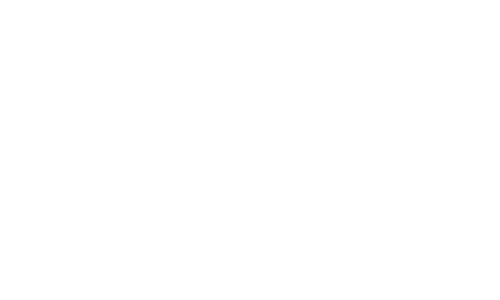

In [152]:
%matplotlib notebook
plt.rcParams['figure.figsize'] = [5, 3]

x = np.linspace(-10, 10, 101)
y = np.linspace(-10, 10, 101)
X, Y = np.meshgrid(x, y)

fig = plt.figure()
fig.suptitle('$x^2+y^2-50\,sin(.5(x+y))$', fontsize=16)

ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(X, Y, f([X, Y]), rstride=10, cstride=10)

plt.show()

<IPython.core.display.Javascript object>


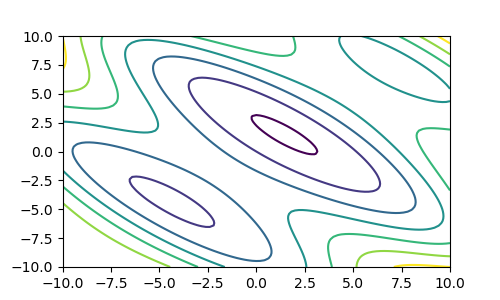

In [153]:
%matplotlib notebook
plt.rcParams['figure.figsize'] = [5, 3]
x = np.linspace(-10, 10, 101)
y = np.linspace(-10, 10, 101)
X, Y = np.meshgrid(x, y)

fig = plt.figure()

ax = fig.add_subplot(111)
ax.contour(X, Y, f([X, Y]))

plt.show()

In [154]:
import numpy as np
from scipy.optimize import minimize

### Nelder-Mead

In [155]:
x0 = np.array([0, 0])
res = minimize(f, x0, method='nelder-mead', options={'xtol': 1e-8, 'disp': True})
print(res.x)
f(res.x)

Optimization terminated successfully.
         Current function value: -45.431122
         Iterations: 76
         Function evaluations: 137
[1.4541966  1.45419654]


-45.43112199357746

In [156]:
res

 final_simplex: (array([[1.4541966 , 1.45419654],
       [1.4541966 , 1.45419654],
       [1.4541966 , 1.45419654]]), array([-45.43112199, -45.43112199, -45.43112199]))
           fun: -45.43112199357746
       message: 'Optimization terminated successfully.'
          nfev: 137
           nit: 76
        status: 0
       success: True
             x: array([1.4541966 , 1.45419654])

### Gradient and Hessian

In [157]:
fgrad = nd.Gradient(f)
fhess = nd.Hessian(f)

In [158]:
type(fgrad)

numdifftools.core.Gradient

### Conjugate Gradient

In [159]:
x0 = np.array([0, 0])
res = minimize(f, x0, method='CG', jac=fgrad, options={'disp': True})
print(res.x)

Optimization terminated successfully.
         Current function value: -45.431122
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 8
[1.45419657 1.45419657]


### Broyden, Fletcher, Goldfarb, and Shanno (BFGS)

In [160]:
x0 = np.array([0, 0])
res = minimize(f, x0, method='BFGS', jac=fgrad, options={'gtol': 1e-8, 'disp': True})
print(res.x)
f(res.x)

Optimization terminated successfully.
         Current function value: -45.431122
         Iterations: 5
         Function evaluations: 7
         Gradient evaluations: 7
[1.45419657 1.45419657]


-45.43112199357746

### Newton-CG

In [161]:
x0 = np.array([0, 0])
res = minimize(f, x0, method='Newton-CG', jac=fgrad, hess=fhess, options={'xtol': 1e-8, 'disp': True})
print(res.x)
f(res.x)

Optimization terminated successfully.
         Current function value: -45.431122
         Iterations: 5
         Function evaluations: 9
         Gradient evaluations: 13
         Hessian evaluations: 5
[1.45419658 1.45419658]


-45.43112199357747

### Maximum Likelihood

In [162]:
mu = 18
sigma = 5
n = 30
S = np.random.normal(loc=mu, scale=sigma, size=n)

In [163]:
def likelihood(par):
    # par[0]=mu
    # par[1]=sigma
    
    v = 0
    
    for x in S:
        v += -.5*((x-par[0])/par[1])**2-np.log(par[1])
    
    return -v

In [164]:
x0 = np.array([1, 1])
res = minimize(likelihood, x0, method='nelder-mead', options={'xtol': 1e-8, 'disp': True})

Optimization terminated successfully.
         Current function value: 62.562558
         Iterations: 94
         Function evaluations: 186


In [165]:
res.x

array([17.57308836,  4.88133418])

In [166]:
S.mean()

17.573088308542683

## Consumer´s problem with CES utility

In [167]:
def utility(x, *args):
    return -(x**.25+(args[0]-args[1]*x)**.25)

In [168]:
def demand(m, p):
    x = opt.minimize(utility, .3, args=(m, p), method="CG").x[0]
    return (x, m-p*x)

In [169]:
demand(5, 2)

(1.1062334943922492, 2.7875330112155017)

In [170]:
price = np.arange(.1, 5, .1)

## Regressão Múltipla

In [171]:
x1 = np.random.uniform(0, 100, size=20000)

In [172]:
x2 = np.random.uniform(0, 100, size=20000)

In [173]:
x2 = .9*x2+.1*x1

In [174]:
sigma = 5
y = 10+.4*x1+.7*x2+np.random.normal(loc=0, scale=sigma, size=20000)

In [175]:
def my_ols(beta):  
    return np.sum((y-beta[0]-beta[1]*x1-beta[2]*x2)**2)   

In [176]:
opt.minimize(my_ols, (10.1, .5, .6), method="CG")

     fun: 497096.51526724786
     jac: array([0.09375   , 0.31640625, 0.15625   ])
 message: 'Desired error not necessarily achieved due to precision loss.'
    nfev: 626
     nit: 24
    njev: 123
  status: 2
 success: False
       x: array([9.91014709, 0.4020818 , 0.70068662])

## OLS with matrices

In [178]:
import io

In [185]:
DATA = np.loadtxt("data/regression.csv", delimiter=";")

In [186]:
DATA

array([[ 19.1503647 ,  19.86175115,  37.76143252],
       [ 74.48652608,  36.51600696, 118.1015082 ],
       [ 92.52296518,  65.04593036, 415.2253619 ],
       ...,
       [ 71.10202338,  84.71663564, 470.9957971 ],
       [ 57.05130161,  63.70372631, 382.7933641 ],
       [ 30.32013916,  58.94863735, 200.9883957 ]])

In [187]:
DATA.shape

(500, 3)

In [188]:
y = DATA[:, 2].reshape(500, 1)

In [189]:
X = DATA[:, 0:2].reshape(500, 2)

In [192]:
c = np.ones(500).reshape(500, 1)
X = np.concatenate((c, X), axis=1)

In [193]:
def my_ols(y, X):
    
    results = {}
    
    (n, k) = X.shape
    results['n'] = n
    results['k'] = k
    
    beta = np.linalg.inv(X.T @ X) @ X.T @ y
    results['beta'] = beta
    
    e = y - X @ beta
    results['residuas'] = e
    
    SSE = sum([e**2 for e in e])[0]
    results['SSE'] = SSE
    
    sigma = np.sqrt(SSE/(n-k))
    results['sigma'] = sigma
    
    V = sigma**2*np.linalg.inv(X.T @ X)
    results['V'] = V
    
    stderr_beta = np.sqrt(np.diag(V))
    results['stderr_beta'] = stderr_beta
    
    t = beta/stderr_beta
    results['t'] = t
    
    # results['p-values'] = 
    
    ybar = np.mean(y)
    SQT = sum([(q-ybar)**2 for q in y])[0]
    results['SQT'] = SQT
    
    results['R2'] = 1-(SSE/SQT)
    
    return results 

In [195]:
res = my_ols(y, X)

In [196]:
res

{'R2': 0.5985995381650879,
 'SQT': 9376178.724748027,
 'SSE': 3763602.4703605347,
 'V': array([[ 1.15445286e+02, -5.91775326e-01, -1.40469455e+00],
        [-5.91775326e-01,  2.16566265e-02, -1.01166076e-02],
        [-1.40469455e+00, -1.01166076e-02,  3.83194387e-02]]),
 'beta': array([[46.56424501],
        [ 3.13088995],
        [ 1.65078469]]),
 'k': 3,
 'n': 500,
 'residuas': array([[-101.5479714 ],
        [-221.95191746],
        [ -28.39493021],
        [ -55.33220907],
        [  46.99151994],
        [ -61.49876145],
        [ -10.97375688],
        [  56.04286631],
        [-107.07201378],
        [ -22.64234823],
        [  18.65252702],
        [   4.20478851],
        [  58.73792368],
        [ -96.97502295],
        [ -32.86295192],
        [ -20.22262579],
        [ -67.86712849],
        [  31.87090306],
        [-162.09171263],
        [ -30.01260059],
        [  11.30891441],
        [ 158.79214349],
        [-114.42340488],
        [ 142.02318218],
        [  -7.579

In [197]:
res['R2']

0.5985995381650879